<a href="https://colab.research.google.com/github/Aribaldi/Mlinreg/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone repository

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!git clone https://github.com/Aribaldi/Mlinreg '/content/drive/MyDrive/Mlinreg/'

Cloning into '/content/drive/MyDrive/Mlinreg'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34 (delta 14), reused 20 (delta 7), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [2]:
%cd  /content/drive/MyDrive/Mlinreg/
!git status

/content/drive/MyDrive/Mlinreg
On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	data/

nothing added to commit but untracked files present (use "git add" to track)


In [91]:
!git fetch

remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 22 (delta 11), reused 16 (delta 8), pack-reused 0
Unpacking objects: 100% (22/22), done.
From https://github.com/Aribaldi/Mlinreg
   03a4e1e..bb8e97f  master     -> origin/master


In [93]:
!git pull

Updating 03a4e1e..bb8e97f
Fast-forward
 LinearRegression.ipynb  | 2267 +++++++++++++++++++++++++++++++++++++++++++++--
 matrix.py               |   26 +-
 optimizers/LSM.py       |   48 +
 optimizers/Optimizer.py |    3 +-
 4 files changed, 2270 insertions(+), 74 deletions(-)
 create mode 100644 optimizers/LSM.py


# **Скачка данных**

Download


In [4]:
import os
import pandas as pd
import glob

In [ ]:
START_YEAR = 2020
START_MONTH = 1
END_YEAR = 2020
END_MONTH = 3

In [ ]:
if not os.path.exists('data/'):
    os.makedirs('data/')

!sh utils/downloader.sh {START_MONTH} {START_YEAR} {END_MONTH} {END_YEAR}

Preprocess 


In [ ]:
columns = {
    'YEAR' : 'Year', 
    'MONTH' : 'Month', 
    'DAY_OF_MONTH' : 'DayofMonth', 
    'DAY_OF_WEEK' : 'DayOfWeek', 
    'DEP_TIME' : 'DepTime', 
    'CRS_DEP_TIME' : 'CRSDepTime',
    'ARR_TIME' : 'ArrTime',
    'CRS_ARR_TIME' : 'CRSArrTime',
    'OP_UNIQUE_CARRIER' : 'UniqueCarrier',
    'OP_CARRIER_FL_NUM' : 'FlightNum', 
    'TAIL_NUM' : 'TailNum', 
    'ACTUAL_ELAPSED_TIME' : 'ActualElapsedTime', 
    'CRS_ELAPSED_TIME' : 'CRSElapsedTime', 
    'AIR_TIME' : 'AirTime',
    'ARR_DELAY' : 'ArrDelay',
    'DEP_DELAY' : 'DepDelay',
    'ORIGIN' : 'Origin', 
    'DEST' : 'Dest', 
    'DISTANCE' : 'Distance',
    'TAXI_IN' : 'TaxiIn',
    'TAXI_OUT' : 'TaxiOut', 
    'CANCELLED' : 'Cancelled', 
    'CANCELLATION_CODE' : 'CancellationCode', 
    'DIVERTED' : 'Diverted',
    'CARRIER_DELAY' : 'CarrierDelay', 
    'WEATHER_DELAY' : 'WeatherDelay', 
    'NAS_DELAY' : 'NASDelay', 
    'SECURITY_DELAY' : 'SecurityDelay',
    'LATE_AIRCRAFT_DELAY' : 'LateAircraftDelay'
}

In [ ]:
!pwd

/content/drive/My Drive/Mlinreg/data


In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv.rename(columns=columns, inplace=True)
combined_csv = combined_csv[list(columns.values())]
combined_csv.to_csv('raw.csv', index=False, encoding='utf-8-sig')
os.chdir('../')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
raw = pd.read_csv('data/raw.csv')

In [6]:
raw

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2020,1,17,5,909.0,845,1418.0,1410,WN,458,N7736A,189.0,205.0,171.0,8.0,24.0,LAS,MDW,1521.0,5.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020,1,17,5,552.0,550,1056.0,1110,WN,1469,N961WN,184.0,200.0,172.0,-14.0,2.0,LAS,MDW,1521.0,2.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,17,5,NaN,1355,NaN,1930,WN,1486,N8667D,NaN,215.0,NaN,NaN,NaN,LAS,MDW,1521.0,NaN,NaN,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,17,5,NaN,1640,NaN,2205,WN,1728,N567WN,NaN,205.0,NaN,NaN,NaN,LAS,MDW,1521.0,NaN,NaN,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,17,5,739.0,740,1305.0,1305,WN,1744,N8525S,206.0,205.0,181.0,0.0,-1.0,LAS,MDW,1521.0,17.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829838,2020,3,1,7,1534.0,1530,1916.0,1920,UA,201,N776UA,462.0,470.0,435.0,-4.0,4.0,HNL,GUM,3801.0,3.0,24.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1829839,2020,3,1,7,732.0,740,1829.0,1845,UA,200,N779UA,417.0,425.0,400.0,-16.0,-8.0,GUM,HNL,3801.0,4.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1829840,2020,3,1,7,717.0,730,756.0,811,UA,174,N79279,39.0,41.0,24.0,-15.0,-13.0,GUM,SPN,129.0,4.0,11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1829841,2020,3,1,7,849.0,915,925.0,955,UA,117,N79279,36.0,40.0,24.0,-30.0,-26.0,SPN,GUM,129.0,3.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


# **Анализ фич**

EDA

**Чистка**


*   Дроп лишних столбцов
*   Дроп отмененных и перенаправленных полетов


In [7]:
df = raw.drop(['Year', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 
               'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut', 
               'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode', 'DepTime' ], axis=1)
df = df[(df.Cancelled != 1.) & (df.Diverted != 1.)]
df = df.drop(['Cancelled', 'Diverted'], axis=1)
df['CRSDepTime'].isna().sum()
temp = df['CRSDepTime'].to_numpy()
temp = list(map(lambda x: x // 100 * 60 + x % 100, temp))
df['CRSDepTime'] = pd.Series(temp, index=df.index)
df

,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,DepDelay,Origin,Dest,Distance
0,1,17,5,525,WN,24.0,LAS,MDW,1521.0
1,1,17,5,350,WN,2.0,LAS,MDW,1521.0
4,1,17,5,460,WN,-1.0,LAS,MDW,1521.0
6,1,17,5,1160,WN,1.0,LAS,MKE,1524.0
7,1,17,5,560,WN,13.0,LAS,MKE,1524.0
...,...,...,...,...,...,...,...,...,...
1829838,3,1,7,930,UA,4.0,HNL,GUM,3801.0
1829839,3,1,7,460,UA,-8.0,GUM,HNL,3801.0
1829840,3,1,7,450,UA,-13.0,GUM,SPN,129.0
1829841,3,1,7,555,UA,-26.0,SPN,GUM,129.0


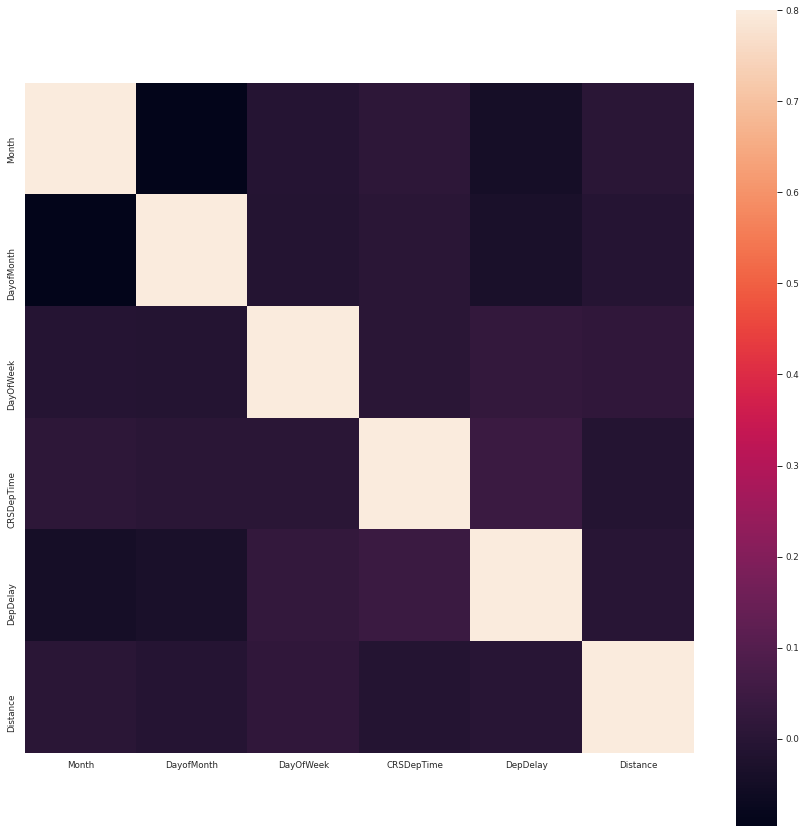

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
cmat = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cmat, vmax=.8, square=True)
plt.show()

**Анализ множества значений различных фич**

In [ ]:
import numpy as np
carriers_list = np.unique(df['UniqueCarrier'].to_numpy())
print(f"Carriers list: \n {carriers_list}")
routs_count = df.groupby(['Origin', 'Dest']).size().reset_index().rename(columns={0:'count'})
print(f"Routs count: \n {routs_count}")
airports_list = np.unique(df['Origin'].to_numpy())
print(f"Airports num: {airports_list.shape}")

Carriers list: 
 ['9E' 'AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA'
 'WN' 'YV' 'YX']
Routs count: 
      Origin Dest  count
0       ABE  ATL    206
1       ABE  BNA     13
2       ABE  CLT    249
3       ABE  DTW    231
4       ABE  FLL     18
...     ...  ...    ...
5885    XWA  MSP    175
5886    YAK  CDV     74
5887    YAK  JNU     83
5888    YUM  DFW     97
5889    YUM  PHX    422

[5890 rows x 3 columns]
Airports num: (353,)


**Статистика по авиакомпаниям-перевозчикам**

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = df['DepDelay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
UniqueCarrier,,,,
HA,-43.0,1483.0,19623.0,0.117006
G4,-66.0,1507.0,25171.0,7.781733
EV,-31.0,1290.0,31981.0,1.710985
F9,-39.0,645.0,33741.0,4.731425
YV,-56.0,1890.0,49257.0,8.097590
NK,-47.0,1083.0,52863.0,6.942701
AS,-80.0,823.0,58475.0,2.863395
9E,-41.0,2579.0,66990.0,4.220436
OH,-49.0,1919.0,67350.0,11.836006


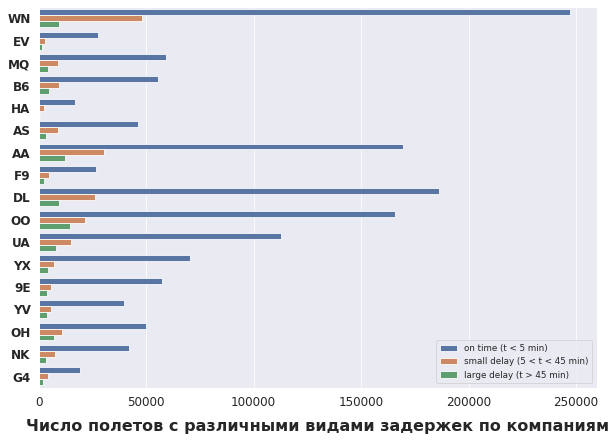

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DelayLevel'] = df['DepDelay'].apply(delay_type)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="UniqueCarrier", hue='DelayLevel', data=df)
labels = [item for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Число полетов с различными видами задержек по компаниям', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

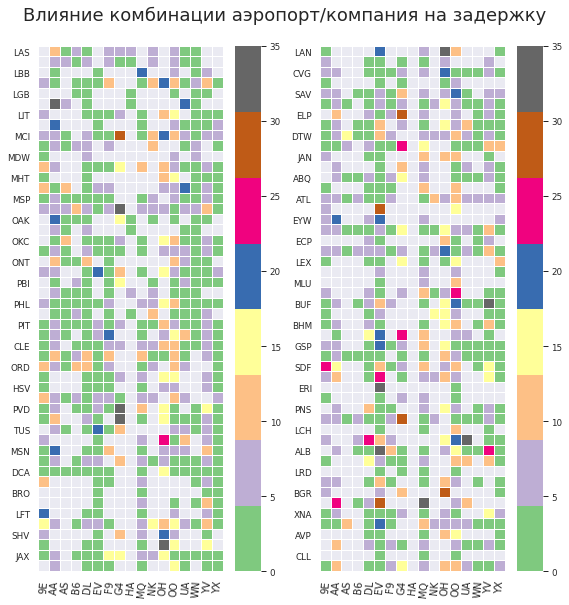

In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(df['Origin'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in carriers_list:
    df1 = df[df['UniqueCarrier'] == carrier]
    test = df1['DepDelay'].groupby(df['Origin']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean']

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:]
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:]
fig.text(0.5, 1.02, "Влияние комбинации аэропорт/компания на задержку", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [ ]:
carrier = 'WN'
id_airport = 4
list_origin_airport = df[df['UniqueCarrier'] == carrier]['Origin'].unique()
df2 = df[(df['UniqueCarrier'] == carrier) & (df['Origin'] == list_origin_airport[id_airport])]
df2.sort_values('CRSDepTime', inplace = True)

from scipy.optimize import curve_fit
def func2(x, a, b, c):
    return a * x**2 +  b*x + c
df2['dep_time'] =  df2['CRSDepTime'].apply(lambda x:x.time())
test2 = df2['DepDelay'].groupby(df2['dep_time']).apply(get_stats).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

# **Обучение**

Select features and split data

In [84]:
res = df.copy(deep=True)
res = res.sample(1000)
Y = res['DepDelay'].to_list()
res = pd.concat([res, pd.get_dummies(res.UniqueCarrier)], axis=1)
res = res.drop(['Month', 'DayofMonth', 'DayOfWeek', 'DepDelay', 'UniqueCarrier', 'Origin', 'Dest'], axis=1)
X = res.values.tolist()
len(X), len(X[0]), len(Y)

(1000, 19, 1000)

In [94]:
from optimizers.Adam import Adam
from optimizers.AdaGrad import AdaGrad
optim = Adam(X, Y, params={"epochs": 50,
                            "learning_rate": 0.03,
                            "batch_size": 4,
                            'epsilon': 1e-8,
                            'beta_1': 0.9,
                            'beta_2': 0.999,
                            "regularization": "l1",
                            "weight_decay": 1e-6
                            })
print(optim.fit())
optim = AdaGrad(X, Y, params={"epochs": 50,
                            "learning_rate": 0.03,
                            "batch_size": 4,
                            'epsilon': 1e-8,
                            'beta_1': 0.9,
                            'beta_2': 0.999,
                            "regularization": "l1",
                            "weight_decay": 1e-6
                            })
optim.fit()

[1.0, 1345.0, 2279.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ArithmeticError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
RANDOM_STATE = 0
TRAIN_NUM_SAMPLES = 1000
TEST_NUM_SAMPLES = 200

In [ ]:
df = pd.read_csv('data/raw.csv')

In [ ]:
target = 'DepDelay'
features = ['CRSDepTime', 'Distance', *carriers_list]
features

['CRSDepTime',
 'Distance',
 '9E',
 'AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'G4',
 'HA',
 'MQ',
 'NK',
 'OH',
 'OO',
 'UA',
 'WN',
 'YV',
 'YX']

In [ ]:
train = res.sample(TRAIN_NUM_SAMPLES, random_state=RANDOM_STATE)
test = res[~res.index.isin(train.index)].sample(TEST_NUM_SAMPLES, random_state=RANDOM_STATE)

In [ ]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

Initialize model

In [ ]:
MODEL_KWARGS = {
    'loss' : 'squared_loss',
    'penalty' : 'l1',
    'alpha' : 0.0000001
}

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
reg = SGDRegressor(**MODEL_KWARGS)

Initialize metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

Cross Validation

In [ ]:
#train = pd.read_csv('data/train.csv')
x_train = train[features].to_numpy()
y_train = train[target].to_numpy()
x_train = scaler.fit_transform(x_train)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold = KFold(5)

results = pd.DataFrame(columns=['alpha', 'MSE', 'R2'])
for _, (train_idx, val_idx) in enumerate(k_fold.split(x_train, y_train)):
    reg.fit(x_train[train_idx], y_train[train_idx])
    y_pred = reg.predict(x_train[val_idx])
    r2 = r2_score(y_true=y_train[val_idx], y_pred=y_pred)
    mse = mean_squared_error(y_true=y_train[val_idx], y_pred=y_pred)
    results = results.append({'alpha' : MODEL_KWARGS['alpha'], 'MSE' : mse, 'R2' : r2}, ignore_index=True)

In [ ]:
results

,alpha,MSE,R2
0,1.000000e-07,4533.317430,-0.020298
1,1.000000e-07,681.849526,-0.115264
2,1.000000e-07,1270.064461,-0.015248
3,1.000000e-07,433.299264,-0.137165
4,1.000000e-07,1747.068536,-0.024986


In [ ]:
results[['MSE', 'R2']].describe()

,MSE,R2
count,5.000000,5.000000
mean,1733.119843,-0.062592
std,1646.999104,0.058694
min,433.299264,-0.137165
25%,681.849526,-0.115264
50%,1270.064461,-0.024986
75%,1747.068536,-0.020298
max,4533.317430,-0.015248


Train

In [ ]:
reg.fit(x_train, y_train)

SGDRegressor(alpha=1e-07, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Test

In [ ]:
test = pd.read_csv('data/test.csv')

x_test = test[features].to_numpy()
y_test = test[target].to_numpy()

x_test = scaler.transform(x_test)

In [ ]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [ ]:
print(f'MSE: {mse},\nR2: {r2}.')

MSE: 384.31994137203833,
R2: -0.0329559589893369.
